###1. Read in the data and perform preliminary checks.

In [3]:
import pandas as pd
# attach the file
climateDF = pd.read_csv("Climate_Correlations.csv")
print(climateDF)

# get the number of samples = 1269
print(len(climateDF["CASES"]))

# how many years do we have? 25
years = pd.unique(climateDF["YEAR"])
print(years)
print(len(years))

# how many weeks for each year? Different based on year
for year in years:
    # iterate through each row
    counter = 0
    for i in range(0,len(climateDF)):
        if climateDF["YEAR"][i] == year:
            # increase the counter
            counter += 1
    print(counter)

         EPI        t2m         e    lai_hv    lai_lv         ssr       tcc  \
0     199301  297.78940 -0.103413  2.165826  1.131991  28923.4690  0.627398   
1     199302  297.64352 -0.102992  2.171554  1.131615  42002.4530  0.650488   
2     199303  298.32034 -0.119359  2.174013  1.131891  59272.6520  0.279556   
3     199304  298.37518 -0.140828  2.174992  1.132465  68860.8500  0.469671   
4     199305  298.42550 -0.137572  2.175970  1.133039  83244.4200  0.392348   
...      ...        ...       ...       ...       ...         ...       ...   
1264  202344  298.30900 -0.135437  2.085116  1.089771   3374.0293  0.988676   
1265  202345  299.34320 -0.105246  2.080401  1.093079   3568.6658  0.742897   
1266  202346  299.11030 -0.115640  2.078321  1.097037   2740.3990  0.949415   
1267  202347  298.80582 -0.112461  2.092449  1.104988   3255.7290  0.793152   
1268  202348  299.20435 -0.108853  2.109212  1.113584   4708.1646  0.621207   

            tp         sp  SEMANA  YEAR  CASES  
0 

In [4]:
# retrieve information about the variables and their datatypes
print(climateDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1269 entries, 0 to 1268
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EPI     1269 non-null   int64  
 1   t2m     1269 non-null   float64
 2   e       1269 non-null   float64
 3   lai_hv  1269 non-null   float64
 4   lai_lv  1269 non-null   float64
 5   ssr     1269 non-null   float64
 6   tcc     1269 non-null   float64
 7   tp      1269 non-null   float64
 8   sp      1269 non-null   float64
 9   SEMANA  1269 non-null   int64  
 10  YEAR    1269 non-null   int64  
 11  CASES   1269 non-null   int64  
dtypes: float64(8), int64(4)
memory usage: 119.1 KB
None


There are 1269 samples, with 25 years of weekly (epi week) data. The number of epi weeks varies across years, with the mode being 52. The datatypes are either integers or floats, so they can be used as training and testing data in machine learning algorithms/models.

###2. Check for any missing values, outliers, or statistics.

In [5]:
# check for any missing values
climateDF.isna().apply(pd.value_counts)

,EPI,t2m,e,lai_hv,lai_lv,ssr,tcc,tp,sp,SEMANA,YEAR,CASES
False,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269


There are no missing values for any of the variables.

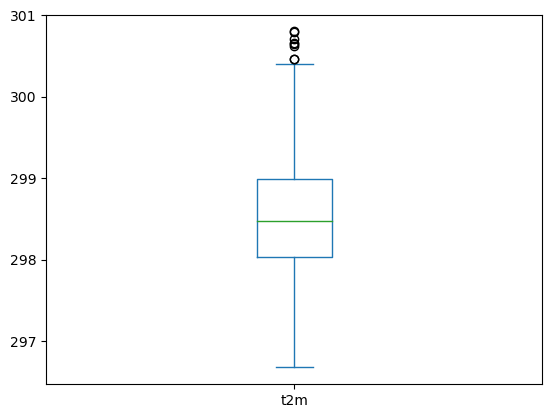

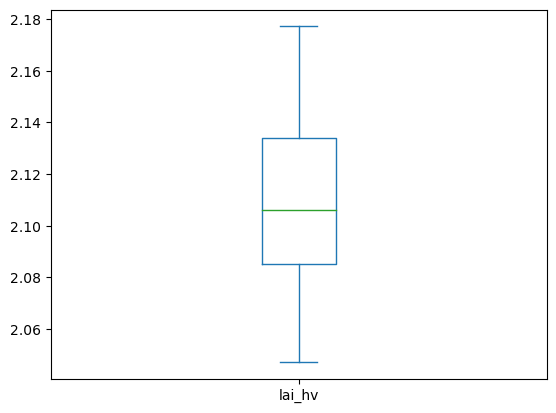

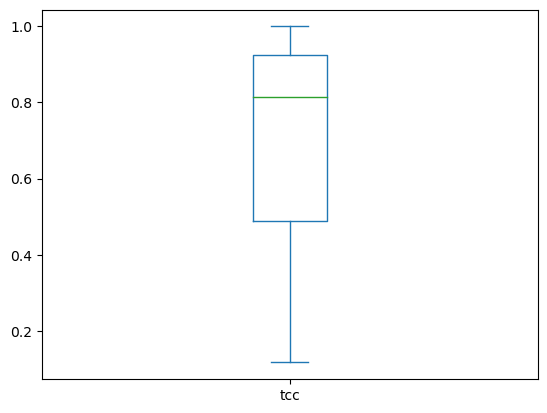

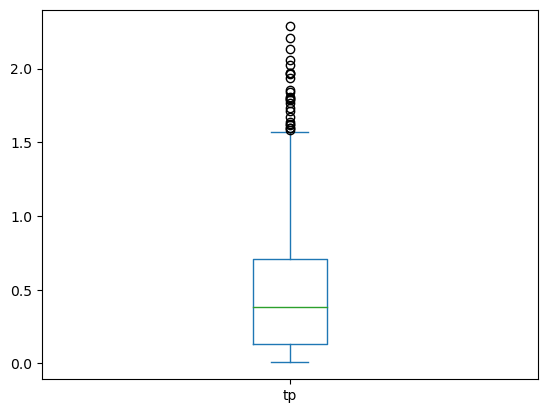

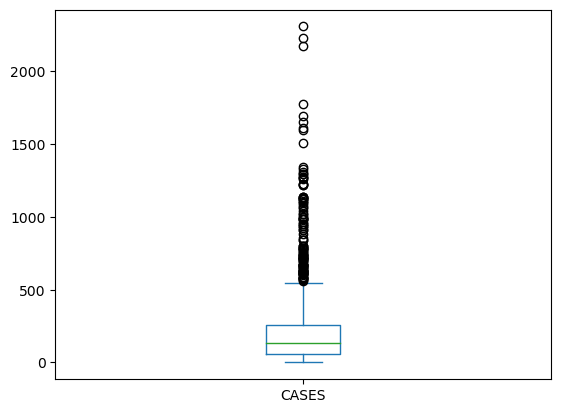

,count,mean,std,min,25%,50%,75%,max
t2m,1269.0,298.528008,0.679786,296.675230,298.035220,298.472300,298.987400,300.802370
lai_hv,1269.0,2.112049,0.035001,2.047124,2.085268,2.106101,2.133957,2.177227
tcc,1269.0,0.707261,0.251421,0.118407,0.489771,0.814181,0.924208,0.998222
tp,1269.0,0.474501,0.407081,0.006546,0.133891,0.379944,0.707992,2.285227
CASES,1269.0,218.959023,278.613588,0.000000,55.000000,133.000000,257.000000,2308.000000


In [29]:
# check for outliers with a boxplot
import matplotlib.pyplot as plt

variables = list(climateDF[["t2m","lai_hv","tcc","tp","CASES"]].columns)

for variable in variables:
    climateDF.plot.box(column=variable)
    plt.show()

# show the descriptive statistics in a horizontal table
climateDF[["t2m","lai_hv","tcc","tp","CASES"]].describe().T

There are many outliers for dengue cases and total precipitation, signifying greater variability and a large standard deviation from week to week. Common practice is to reduce these outliers to 75% or replace these values to the average. However, this will not be completed in this case to retain as much accuracy in the data as possible for future forecasting.

In [12]:
# determine the number of outliers present for Cases
# determine the IQR
Q1 = climateDF[["t2m","e","lai_hv","tcc","tp","CASES"]].quantile(.25)
Q3 = climateDF[["t2m","e","lai_hv","tcc","tp","CASES"]].quantile(.75)
IQR = Q3 - Q1

# sum up the number of outliers for each variable
climate2 = ((climateDF[["t2m","e","lai_hv","tcc","tp","CASES"]] < (Q1 - 1.5*IQR)).sum())
climate3 = ((climateDF[["t2m","e","lai_hv","tcc","tp","CASES"]] > (Q3 + 1.5*IQR)).sum())
print(climate2)
print(climate3)

t2m        0
e         12
lai_hv     0
tcc        0
tp         0
CASES      0
dtype: int64
t2m         8
e           3
lai_hv      0
tcc         0
tp         25
CASES     122
dtype: int64


Evaporation has outliers that are lower than the IQR, indicating that there may be underestimates in some places for evaporation compared to total precipitation, which has outliers that exceed the IQR.
There are an excess of outliers for cases.

###3. Check distributions and correlations.

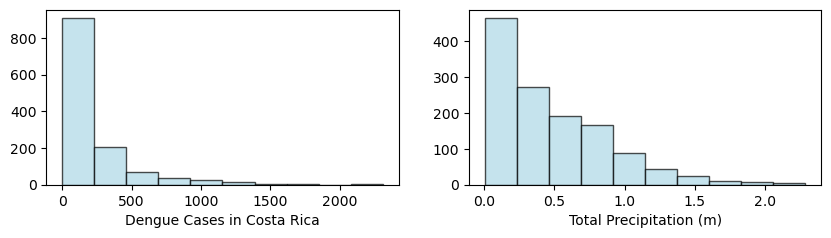

In [18]:
# check distributions

plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.hist(climateDF["CASES"], color="lightblue", edgecolor="black", alpha = 0.7)
plt.xlabel("Dengue Cases in Costa Rica")

plt.subplot(2,2,2)
plt.hist(climateDF["tp"], color="lightblue", edgecolor="black", alpha = 0.7)
plt.xlabel("Total Precipitation (m)")

plt.show()

Both dengue cases and total precipitation show a positive skew, with most values being located at the lower end. 

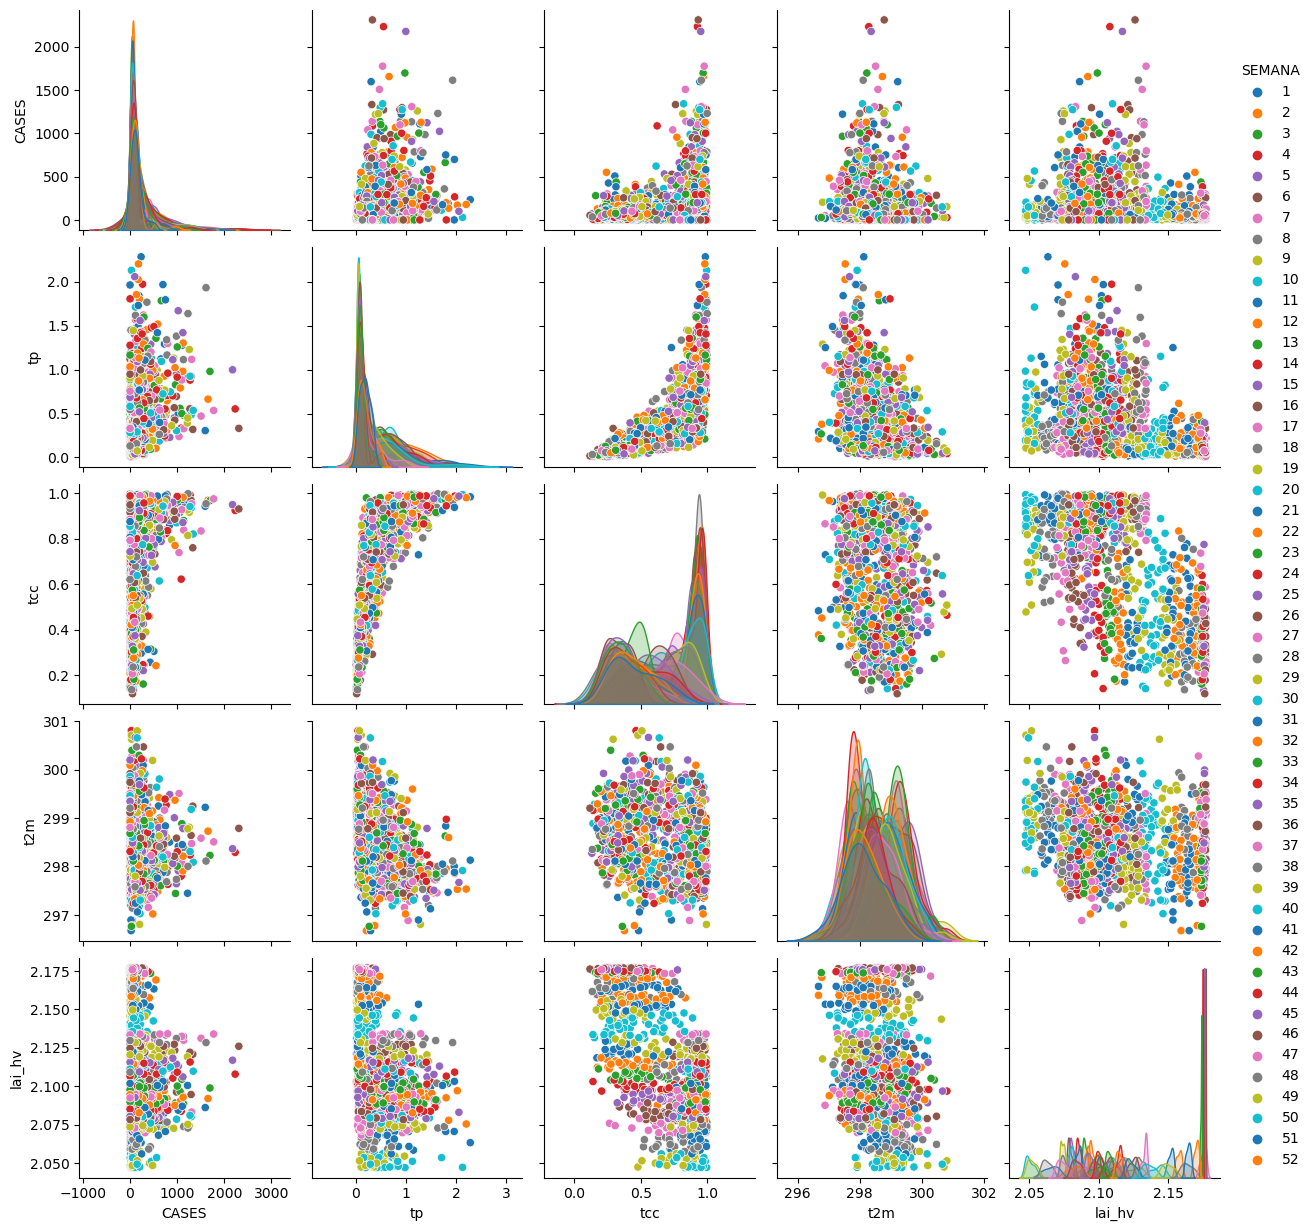

In [20]:
# check the correlations with a pairplot
import seaborn as sb
sb.pairplot(climateDF[["CASES","tp","tcc","t2m","lai_hv","SEMANA"]], hue="SEMANA", palette = "tab10")
plt.show()

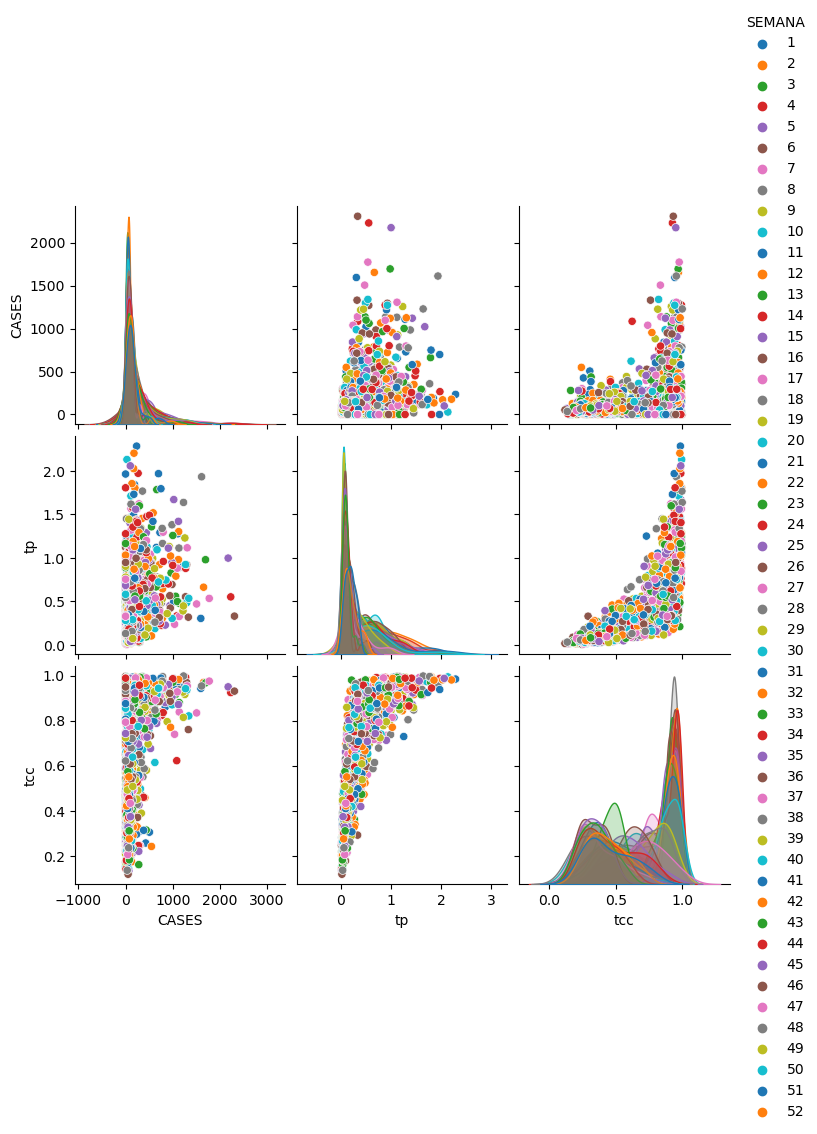

In [21]:
# hone in on the tcc, tp, and CASES variables
sb.pairplot(climateDF[["CASES","tp","tcc","SEMANA"]], hue="SEMANA", palette = "tab10")
plt.show()

Based on the scatterplots, there appears to be the most covariance between dengue cases and total cloud cover, followed by total precipitation. Other variables seem to display a curvilinear relationship, which would not show up as strongly in correlation coefficients.

In [23]:
# determine the numerical correlations between cases and the other variables
climateCorr = climateDF[["CASES","tcc","tp","t2m","lai_hv"]].corr()
climateCorr
# tcc is total cloud cover (proportion)
# tp is total precipitation (m)
# t2m is 2m temperature in K
# lai_hv is the proportion of leaf coverage in high vegetation areas (forests, parks, etc)

,CASES,tcc,tp,t2m,lai_hv
CASES,1.000000,0.349056,0.299657,-0.124376,-0.133338
tcc,0.349056,1.000000,0.714703,-0.237826,-0.633402
tp,0.299657,0.714703,1.000000,-0.426159,-0.394514
t2m,-0.124376,-0.237826,-0.426159,1.000000,-0.162432
lai_hv,-0.133338,-0.633402,-0.394514,-0.162432,1.000000


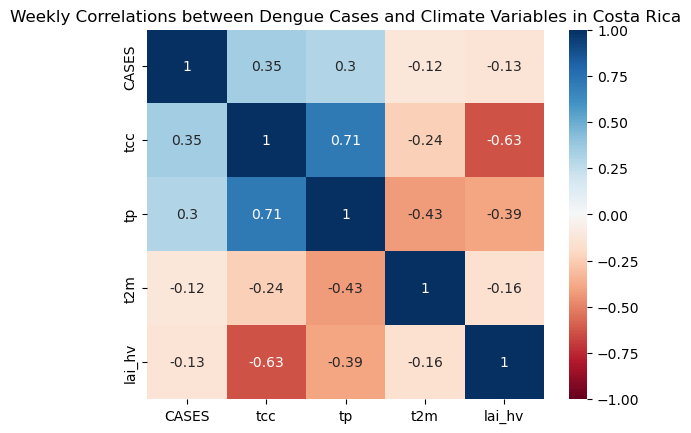

In [25]:
# create a correlation matrix
ax = sb.heatmap(climateCorr, annot=True, cmap="RdBu", vmin=-1, vmax=1)
ax.set(title="Weekly Correlations between Dengue Cases and Climate Variables in Costa Rica")
plt.show()

Total cloud cover and total precipitation have the highest (by magnitude) correlation coefficients with dengue cases. There is also a high correlation between total precipitation and total cloud cover, indicating that only one of these variables should be used in a machine learning or statistical model to avoid multicollinearity, which could result in overfitting.